In [1]:
# !pip uninstall scikit-learn

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [3]:
loan_data = pd.read_csv('loanData.csv')

In [4]:
loan_data[:3]
# loan_data.head(3)
# loan_data.sample(3)           #random sampling

,id,gender,age,married,dependents,education,self_employed,business_type,applicant_income,applicant_work_period,coapplicant_income,credit_history,credit_amount,property_area,property_type,credit_rate,loan_amount,loan_term,loan_status
0,LA001250,Male,55,Yes,3+,Not Graduate,No,88,4755,51,0.0,0.0,0,Semiurban,3,8,2090,0,0
1,LA001864,Male,68,Yes,3+,Not Graduate,No,14,4931,47,0.0,NaN,0,Semiurban,3,7,5376,24,0
2,LA002536,Male,43,Yes,3+,Not Graduate,No,56,3095,33,0.0,1.0,1382,Rural,3,5,3390,33,1


In [5]:
loan_data.columns

Index(['id', 'gender', 'age', 'married', 'dependents', 'education',
       'self_employed', 'business_type', 'applicant_income',
       'applicant_work_period', 'coapplicant_income', 'credit_history',
       'credit_amount', 'property_area', 'property_type', 'credit_rate',
       'loan_amount', 'loan_term', 'loan_status'],
      dtype='object')

In [6]:
loan_data['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
loan_data['married'].unique()

array(['Yes', 'No', nan], dtype=object)

In [8]:
loan_data['dependents'].unique()

array(['3+', '2', '1', '0', nan], dtype=object)

In [9]:
loan_data['education'].unique()

array(['Not Graduate', 'Graduate'], dtype=object)

In [10]:
loan_data['self_employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
loan_data['business_type'].unique()

array([88, 14, 56, 46, 60, 80, 21, 66, 30, 64, 42, 94,  4, 45, 26, 76, 74,
       35, 43, 59, 11, 29, 61, 78, 51, 81, 58, 10, 37, 16, 49, 55, 96, 36,
       83, 68, 70, 63, 13, 65, 86, 85, 40, 73, 41, 31, 24, 93, 27, 15, 97,
       82, 47,  3, 87, 53, 91, 48, 71, 84, 89, 33, 67, 57, 52, 90,  5,  1,
        2, 28, 77, 79, 92, 72, 99, 17, 44, 69, 95, 38, 20, 54, 34,  9,  8,
       50, 18,  6, 19, 62, 23, 32, 75, 98, 12, 22, 25,  7])

In [12]:
loan_data['credit_history'].unique()

array([ 0., nan,  1.])

In [13]:
loan_data['property_area'].unique()

array(['Semiurban', 'Rural', 'Urban'], dtype=object)

## Mark Data & normalize

##### col value -> int data mapping

In [14]:
loan_data['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [15]:
gendr_mapping = {'Male': 1, 'Female': 0, np.nan: -1}

In [16]:
loan_data['married'].unique()

array(['Yes', 'No', nan], dtype=object)

In [17]:
married_mapping = {'No': 0, 'Yes': 1, np.nan: -1}

In [18]:
loan_data['dependents'].unique()

array(['3+', '2', '1', '0', nan], dtype=object)

In [19]:
dep_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3, np.nan: -1}

In [20]:
loan_data['education'].unique()

array(['Not Graduate', 'Graduate'], dtype=object)

In [21]:
edu_mappiong = {'Graduate': 1, 'Not Graduate': 0}

In [22]:
loan_data['self_employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [23]:
emp_mapping = {'No': 0, 'Yes': 1, np.nan: -1}

In [24]:
loan_data['property_area'].unique()

array(['Semiurban', 'Rural', 'Urban'], dtype=object)

In [25]:
prop_mapping = {'Urban': 1, 'Rural': 3, 'Semiurban': 2}

##### col value -> int data mapping

In [26]:
loan_data = loan_data.replace({'gender': gendr_mapping,
                               'married': married_mapping,
                               'dependents': dep_mapping,
                               'education': edu_mappiong,
                               'self_employed': emp_mapping,
                               'property_area': prop_mapping
                              })

In [27]:
loan_data[:3]

,id,gender,age,married,dependents,education,self_employed,business_type,applicant_income,applicant_work_period,coapplicant_income,credit_history,credit_amount,property_area,property_type,credit_rate,loan_amount,loan_term,loan_status
0,LA001250,1.0,55,1.0,3.0,0,0.0,88,4755,51,0.0,0.0,0,2,3,8,2090,0,0
1,LA001864,1.0,68,1.0,3.0,0,0.0,14,4931,47,0.0,NaN,0,2,3,7,5376,24,0
2,LA002536,1.0,43,1.0,3.0,0,0.0,56,3095,33,0.0,1.0,1382,3,3,5,3390,33,1


# Train Test Split

In [28]:
# excluding id 
X = loan_data.loc[:, 'gender':'loan_term']

In [29]:
y = loan_data.loc[:, 'loan_status']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train Model

In [31]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

In [33]:
calculate_accuracy(model, x_test, y_test)

Accuracy: 85.37%


0.8536585365853658

# Improving Models

In [34]:
model = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    learning_rate=0.04,
    n_estimators=50,
    reg_alpha =0.45,
    reg_lambda=0.6
)
model.fit(x_train, y_train)

print(model.evals_result)
calculate_accuracy(model, x_test, y_test)

<bound method XGBModel.evals_result of XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)>
Accuracy: 83.74%


0.8373983739837398

# show XAI

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

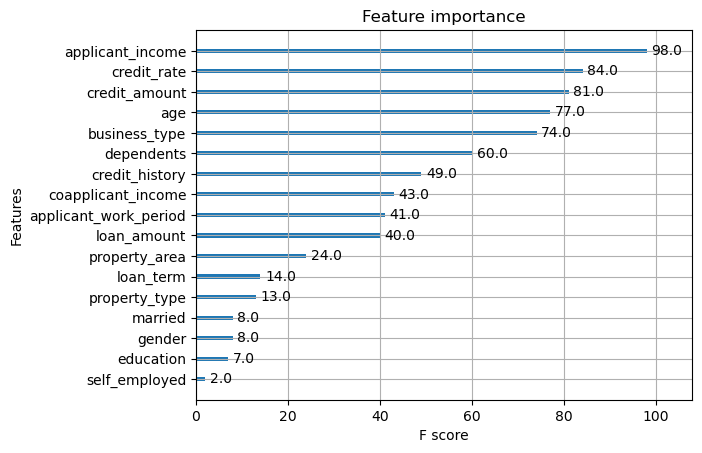

In [35]:
import xgboost
xgboost.plot_importance(model)

In [36]:
import shap

In [37]:
x_train.iloc[1, :]

gender                       1.0
age                         39.0
married                      1.0
dependents                   2.0
education                    1.0
self_employed                0.0
business_type               91.0
applicant_income         16666.0
applicant_work_period       39.0
coapplicant_income           0.0
credit_history               1.0
credit_amount             3571.0
property_area                1.0
property_type                1.0
credit_rate                  4.0
loan_amount              11550.0
loan_term                   30.0
Name: 105, dtype: float64

In [38]:
idx = 13

In [39]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

[14:32:48] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [40]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, x_train)

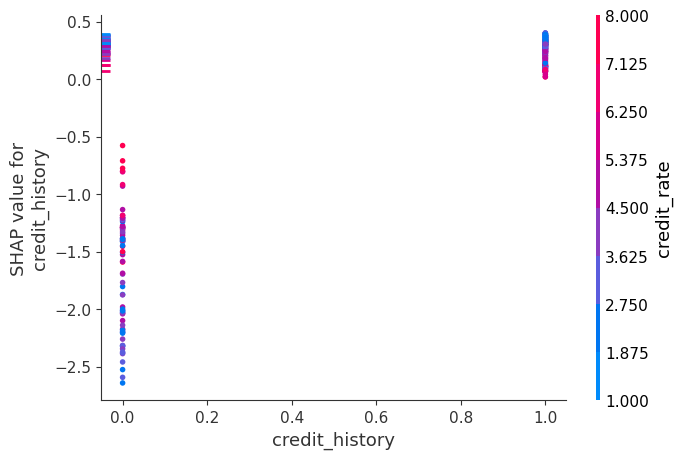

In [41]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("credit_history", shap_values, x_train)

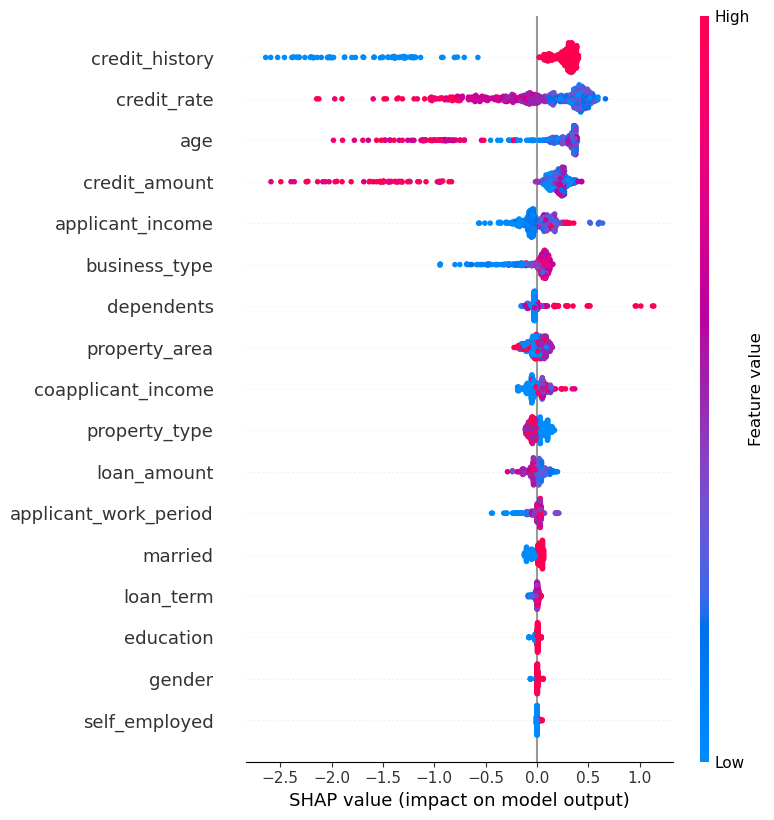

In [42]:
# summarize the effects of all the features
shap.summary_plot(shap_values, x_train)

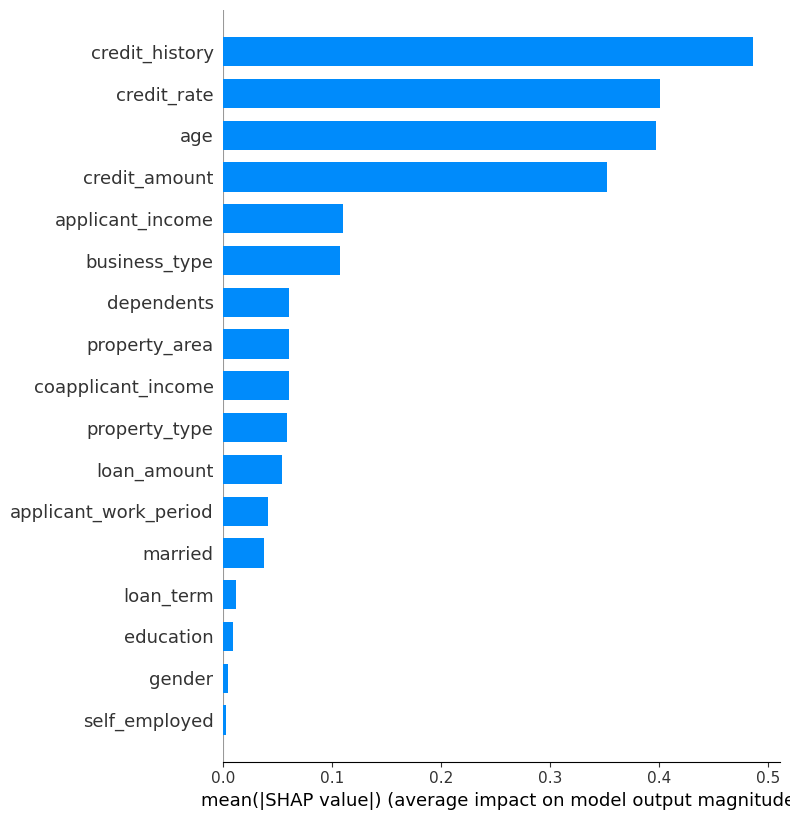

In [43]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

# plot Tree

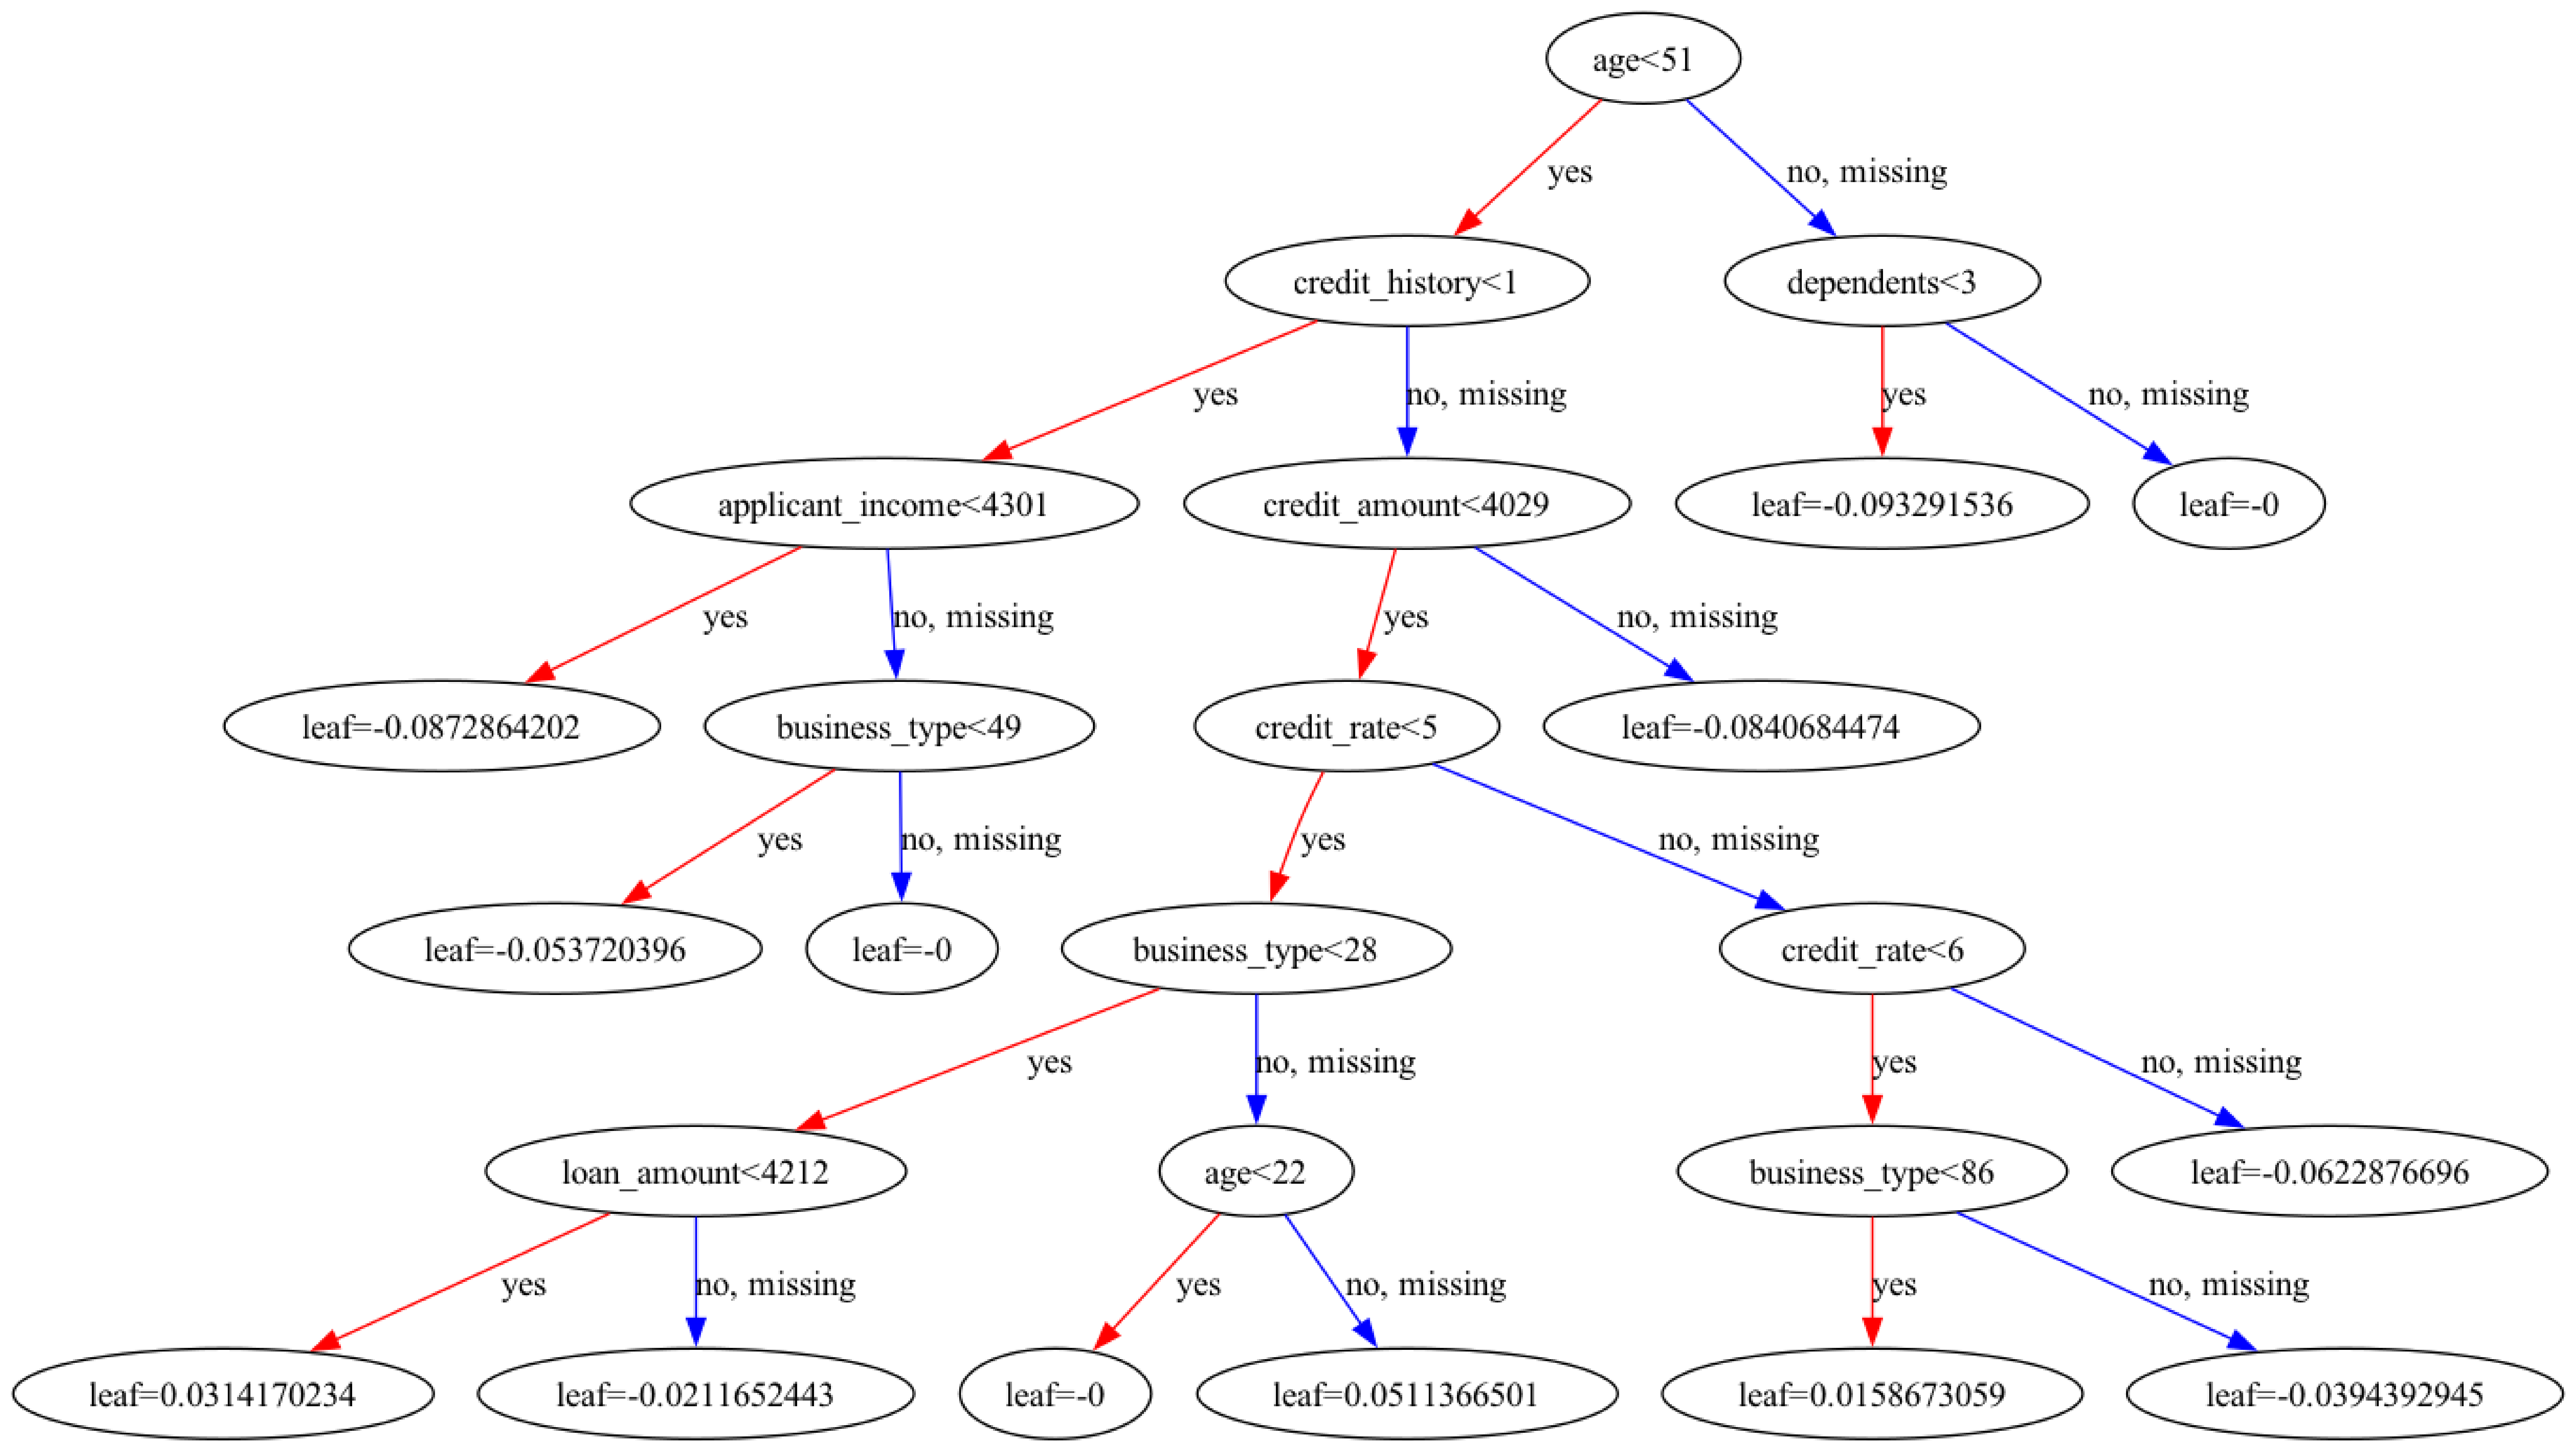

In [44]:
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import matplotlib.pyplot as plt

from xgboost import plot_tree
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 100,200

plot_tree(model)
plt.show()

# Leaf value

https://stackoverflow.com/questions/40926340/what-does-the-value-of-leaf-in-the-following-xgboost-model-tree-diagram-means

For a classification tree with 2 classes {0,1}, the value of the leaf node represent the raw score for class 1. It can be converted to a probability score by using the logistic function. The calculation below use the left most leaf as an example.

1/(1+np.exp(-1*0.167528))=0.5417843204057448
What this means is if a data point ends up being distributed to this leaf, the probability of this data point being class 1 is 0.5417843204057448.

In [45]:
def print_prob(leaf_value):
    result = 1/(1+np.exp(-1*leaf_value))
    print('{:.2%}'.format(result))
    return result

In [46]:
print_prob(-0.064385)

48.39%


0.48390930818332867